# Logistic Regression

### Task :
* To build a logistic regression model that predicts whether a passenger survived the Titanic disaster

### Exploratory Data Analysis (EDA) - Data Exploration and Data Preprocessing

In [115]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [3]:
df = pd.read_csv("./Titanic_train.csv")

In [4]:
df1 = df.copy()

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data types and null values info

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Descriptive statistics for numeric columns

In [10]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### categorical columns

In [9]:
df1.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#### Null counts

In [11]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Replacing missing values in age with median , as feature age is continuous numeric data — median is robust to outliers.

In [19]:
df1['Age'].fillna(df1['Age'].median(), inplace=True)

#### Dropping the column cabin, as it has too many missing values , it is unreliable to impute.

In [20]:
df1.drop(columns=['Cabin'], inplace=True)

#### Replacing missing values with mode as it has only 2 missing values and it is a categorical feature

In [21]:
df1['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [22]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Dropping unnecessary features - PassengerId, Name, Ticket  as they wouldnt be helpful

In [24]:
df1.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Check for duplicates

In [30]:
df1.duplicated().sum()

116

In [31]:
df.duplicated().sum() ## original dataset

0

In [26]:
df1[df1.duplicated(keep=False)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
4,0,3,male,35.0,0,0,8.0500,S
23,1,1,male,28.0,0,0,35.5000,S
26,0,3,male,28.0,0,0,7.2250,C
28,1,3,female,28.0,0,0,7.8792,Q
29,0,3,male,28.0,0,0,7.8958,S
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,28.0,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


###  Dropping duplicates

In [33]:
df2 = df1.drop_duplicates()

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


In [40]:
df2.reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 48.6+ KB


In [41]:
cols = df2.columns
for col in cols:
    print(f"Column {col}: {df2[col].nunique()}")

Column Survived: 2
Column Pclass: 3
Column Sex: 2
Column Age: 88
Column SibSp: 7
Column Parch: 7
Column Fare: 248
Column Embarked: 3


In [42]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Automating EDA process

In [16]:
import ydata_profiling as pp

In [36]:
report = pp.ProfileReport(df2)

In [37]:
report.to_file(output_file='eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 393.96it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### The report shows the feature sex has high correlation with survived. So Sex seems to be a strong predictor of survival.

## Visualizing the data

### Univariate Analysis -  Histogram plot

In [43]:
%matplotlib inline

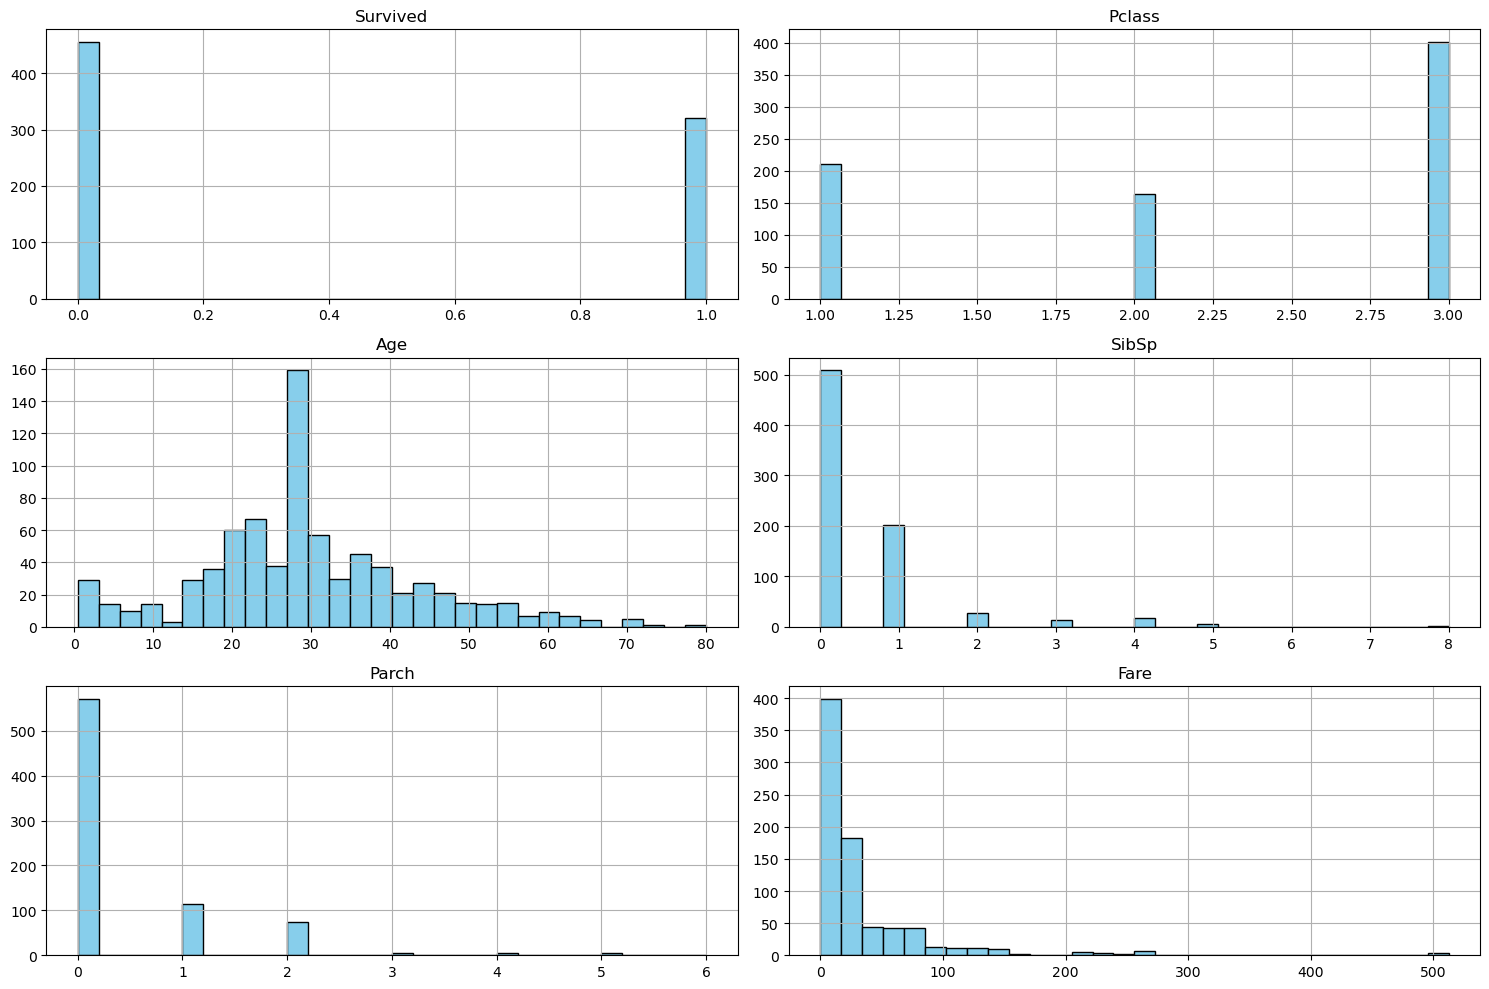

In [44]:
df2.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

### Interpretation of Histograms

The histograms shown represent the distribution of key variables in the Titanic dataset. Below is the interpretation for each:

Survived:
The target variable ‘Survived’ is binary, where 0 indicates did not survive and 1 indicates survived. From the plot, the number of passengers who did not survive is higher than those who did.

Pclass:
The ‘Pclass’ variable represents the passenger class (1st, 2nd, or 3rd class). The majority of passengers were in 3rd class, followed by 1st class and then 2nd class.

Age:
The age distribution is right-skewed. Most passengers were between 20 and 40 years old, with a notable peak around 29-30 years. There are fewer very young and very old passengers.

SibSp:
‘SibSp’ represents the number of siblings or spouses aboard. Most passengers had 0 siblings or spouses, and very few had more than 1. The distribution is heavily skewed to the right.

Parch:
‘Parch’ represents the number of parents or children aboard. Similar to ‘SibSp’, most passengers had no parents or children with them. Very few had 1 or 2, and very rare cases had higher numbers.

Fare:
The fare distribution is highly right-skewed. Most fares were concentrated below 100, with a large number under 50. A few outliers paid very high fares, indicating possibly 1st class luxurious accommodations.



## Boxplot for outlier detection 

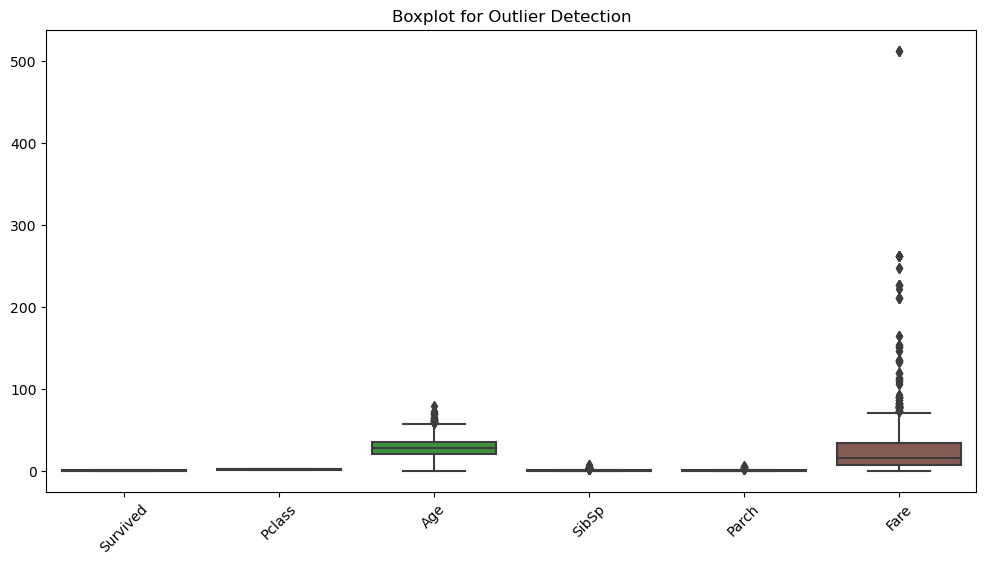

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df2)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

#### Features Fare, Age, SibSp and Parch seem to have outliers.
Outlier detection is not strictly necessary for this Titanic dataset, especially since outliers are valid observations reflecting the diversity of passengers.

### Correlation Analysis

In [47]:
corr_matrix = df2.corr(numeric_only = True)
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.331388,-0.078114,-0.037841,0.069864,0.247159
Pclass,-0.331388,1.000000,-0.342745,0.087050,0.038998,-0.554649
Age,-0.078114,-0.342745,1.000000,-0.279316,-0.182697,0.092503
SibSp,-0.037841,0.087050,-0.279316,1.000000,0.379535,0.133807
Parch,0.069864,0.038998,-0.182697,0.379535,1.000000,0.190823
Fare,0.247159,-0.554649,0.092503,0.133807,0.190823,1.000000


### correlation matrix heatmap

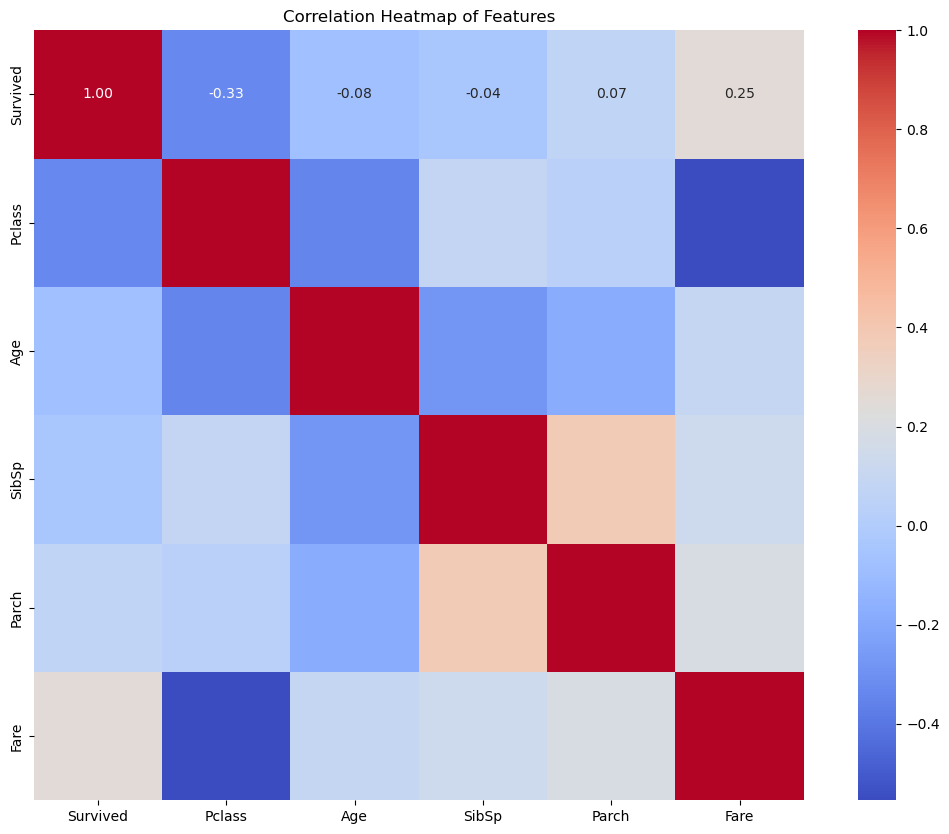

In [48]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Features")
plt.show()

### Encoding categorical variables - Using onehot encoder

In [49]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [50]:
df_encoded = pd.get_dummies(df2, columns=['Sex', 'Embarked'], drop_first=True)
df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


### Scale the data

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
num_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [53]:
scaler = StandardScaler()

In [54]:
df_scaled = df_encoded.copy()

In [55]:
df_scaled[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [56]:
df_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0.883385,-0.551060,0.475876,-0.500754,-0.527515,True,False,True
1,1,-1.461216,0.611945,0.475876,-0.500754,0.695086,False,False,False
2,1,0.883385,-0.260308,-0.534545,-0.500754,-0.514627,False,False,True
3,1,-1.461216,0.393881,0.475876,-0.500754,0.347909,False,False,True
4,0,0.883385,0.393881,-0.534545,-0.500754,-0.512240,True,False,True


### Model Building

### Split the data

In [59]:
X = df_scaled.iloc[:,1:]
y = df_scaled.iloc[:,0]

In [60]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0.883385,-0.551060,0.475876,-0.500754,-0.527515,True,False,True
1,-1.461216,0.611945,0.475876,-0.500754,0.695086,False,False,False
2,0.883385,-0.260308,-0.534545,-0.500754,-0.514627,False,False,True
3,-1.461216,0.393881,0.475876,-0.500754,0.347909,False,False,True
4,0.883385,0.393881,-0.534545,-0.500754,-0.512240,True,False,True


In [61]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [64]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((620, 8), (155, 8), (620,), (155,))

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train,y_train)

LogisticRegression()

In [68]:
yhat_train = model.predict(X_train)

In [75]:
#yhat_train

## Model Evaluation

### Training metrics

In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
confusion_matrix(y_train,yhat_train)

array([[298,  62],
       [ 75, 185]], dtype=int64)

In [78]:
print("Training classification_report: ")
print(classification_report(y_train,yhat_train))

Training classification_report: 
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       360
           1       0.75      0.71      0.73       260

    accuracy                           0.78       620
   macro avg       0.77      0.77      0.77       620
weighted avg       0.78      0.78      0.78       620



### Model performance with training data

Accuracy: The model achieved an accuracy of 78%, correctly predicting survival status for 78% of the training samples.

Precision:

Class 0 (Did not survive): 80% — when the model predicts a passenger didn’t survive, it’s correct 80% of the time.

Class 1 (Survived): 75% — when predicting survival, it’s correct 75% of the time.

Recall:

Class 0: 83% — the model correctly identifies 83% of the actual non-survivors.

Class 1: 71% — it correctly identifies 71% of actual survivors.

F1-Score:
Balanced around 0.73–0.81, indicating reasonable trade-off between precision and recall.

The model performs decently on the training data, with a slightly better ability to correctly identify non-survivors.

### Testing metrics

In [79]:
yhat_test = model.predict(X_test)

In [80]:
confusion_matrix(y_test,yhat_test)

array([[77, 18],
       [18, 42]], dtype=int64)

In [81]:
print("Testing classification_report: ")
print(classification_report(y_test,yhat_test))

Testing classification_report: 
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        95
           1       0.70      0.70      0.70        60

    accuracy                           0.77       155
   macro avg       0.76      0.76      0.76       155
weighted avg       0.77      0.77      0.77       155



### Model performance with testing data
Accuracy: Achieved 77% accuracy — quite consistent with the training set, indicating no major overfitting.

Precision:

Class 0: 81%

Class 1: 70%

Recall:

Class 0: 81%

Class 1: 70%

F1-Score:
Around 0.70–0.81, maintaining the same performance pattern as the training data.

The model generalizes well to unseen data, showing consistent accuracy and balanced precision/recall scores. It slightly favors identifying non-survivors more accurately than survivors.
So, there is consistent performance on both training and testing sets (78% vs 77%) ,there is no signs of overfitting or underfitting.

### ROC Curve Score and plot

In [100]:
from sklearn.metrics import roc_auc_score, roc_curve

In [101]:
y_proba = model.predict_proba(X_test)[:,1]

In [102]:
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)

ROC-AUC Score: 0.850701754385965


In [103]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

### ROC-AUC Score Interpretation:

The ROC-AUC score obtained for the Logistic Regression model is 0.85. This indicates that the model has a good ability to distinguish between passengers who survived and those who did not. A score of 0.5 would represent random guessing, while a score of 1.0 indicates perfect classification. Therefore, a score of 0.85 reflects strong predictive performance.

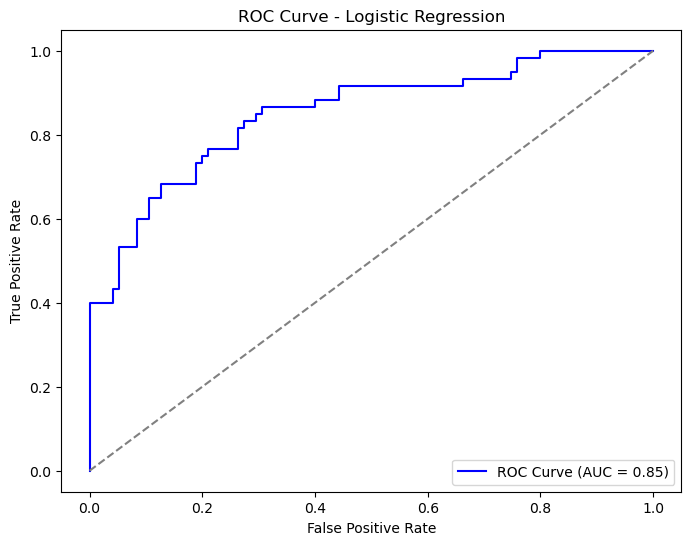

In [104]:
#Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='grey')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

### ROC Curve Interpretation:

The ROC curve visualizes the trade-off between the True Positive Rate (Sensitivity) and the False Positive Rate (1 - Specificity) at various threshold settings. The closer the curve follows the top-left corner, the better the model performs. In this case, the ROC curve shows good separation from the diagonal line, reinforcing the effectiveness of the model.

### Interpretation:
Interpret coefficients

In [99]:
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
print(coeff_df.sort_values(by='Coefficient', ascending=False))


      Feature  Coefficient
4        Fare     0.067492
3       Parch    -0.038036
2       SibSp    -0.388896
7  Embarked_S    -0.414949
6  Embarked_Q    -0.422543
1         Age    -0.541378
0      Pclass    -0.918178
5    Sex_male    -2.224433


### Interpretation of Logistic Regression Coefficients:
The logistic regression model provides coefficients that represent the log-odds change in the probability of survival for a one-unit increase in each feature, holding other variables constant. A positive coefficient increases the log-odds (and hence probability) of survival, while a negative coefficient decreases it.

Key insights from the coefficients:

Fare (0.067):
Higher fare values are positively associated with survival probability. Passengers who paid higher fares had slightly better chances of survival.

Parch (-0.038):
Number of parents/children aboard has a small negative effect on survival, though the impact is relatively minor compared to other variables.

SibSp (-0.389):
Having more siblings or spouses aboard reduces the chance of survival.

Embarked_Q (-0.423) and Embarked_S (-0.415):
Passengers who boarded from Queenstown (Q) and Southampton (S) had lower survival probabilities compared to the reference category (Embarked_C).

Age (-0.541):
Increasing age negatively impacts the chance of survival — older passengers were less likely to survive.

Pclass (-0.918):
Higher passenger class numbers (where 1 is highest and 3 is lowest) are strongly negatively associated with survival. In other words, first-class passengers had the highest chances of survival.

Sex_male (-2.224):
Being male is strongly associated with a lower chance of survival compared to being female (reference category). This is the most significant predictor in the model.

## Deployment using streamlit

In [105]:
import streamlit as st
import joblib

In [134]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [135]:
joblib.dump(model, 'titanic_logistic_model.pkl')

['titanic_logistic_model.pkl']

### Check the titanic_app.py for streamlit code

#### Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?


### 1. What is the difference between precision and recall?

Precision and recall are two important evaluation metrics used in binary classification tasks. Precision measures the proportion of correctly predicted positive cases out of all cases that the model predicted as positive. It answers the question: out of all the instances the model labeled as positive, how many were actually positive? The formula for precision is True Positives divided by the sum of True Positives and False Positives.

Recall, on the other hand, measures the proportion of correctly predicted positive cases out of all actual positive cases in the dataset. It answers the question: out of all the actual positive instances, how many did the model correctly identify? The formula for recall is True Positives divided by the sum of True Positives and False Negatives.

Precision is important in situations where the cost of a false positive is high, such as email spam detection, where marking an important email as spam is undesirable. Recall is crucial in cases where the cost of a false negative is high, such as disease diagnosis, where missing a positive case could have serious consequences.

In summary, precision focuses on the accuracy of positive predictions, while recall focuses on capturing all actual positive cases.

### 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a model evaluation technique that assesses how a machine learning model will perform on an independent dataset. It involves dividing the dataset into multiple parts or folds, training the model on a subset of the data, and validating it on the remaining part. This process is repeated several times, with different subsets used for training and validation, and the results are averaged to obtain a final evaluation score.

The most commonly used method is k-fold cross-validation, where the data is divided into k equal parts. The model is trained on k-1 folds and tested on the remaining one. This process is repeated k times, and the average performance metric is computed.

Cross-validation is important in binary classification because it provides a more reliable estimate of a model's performance, especially when working with limited data or imbalanced classes. It helps prevent overfitting, where a model performs well on the training data but poorly on unseen data. Cross-validation also ensures that the model's evaluation is not biased by the randomness of a single train-test split.

In binary classification problems, stratified k-fold cross-validation is often preferred, as it maintains the same proportion of positive and negative cases in each fold, ensuring a fair evaluation across different subsets of the data.
